In [1]:
%load_ext lab_black

# Visualize emergency service helicopters' operations over Toulouse

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from traffic.core import Traffic
from traffic.data import nm_airspaces, opensky
from traffic.drawing import location
from ipyleaflet import Map, basemaps, basemap_to_tiles, Marker, Icon
from ipywidgets import Layout

/Users/tdubot/opt/anaconda3/lib/python3.7/site-packages/pkg_resources/__init__.py:1151: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  self, resource_name
/Users/tdubot/opt/anaconda3/lib/python3.7/site-packages/ipyleaflet-0.11.4-py3.7.egg/ipyleaflet/leaflet.py:316: DeprecationWarning: metadata {'dtype': None} was set from the constructor. With traitlets 4.1, metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  data = Dataset().tag(dtype=None, sync=True, to_json=ds_x_to_json)


In [3]:
terrain = basemap_to_tiles(basemaps.Stamen.Terrain)
toulouse_barycenter = (43.6043, 1.4437)
toulouse_heliports = [
    (43.635, 1.3677777),  # Blagnac
    (43.6130556, 1.4),  # Purpan
    (43.5613889, 1.4486111),  # Rangueil
]
default_zoom = 12

#### <br> Record a week of traffic over Toulouse from the OpenSky Network (ADS-B data) with traffic library https://traffic-viz.github.io/

In [4]:
t = opensky.history(
    "2020-01-10 07:00",
    "2020-01-17 23:00",
    bounds=location("arrondissement de toulouse").bounds,
)
t.to_pickle("heli.pkl")

#### <br> Filter SAMU flights and display trajectories

In [9]:
t = Traffic.from_file("heli.pkl")


def samu_cs(flight):
    return "SAMU" in flight.callsign


samu_flights = t.filter_if(samu_cs).eval()
print(f"{len(samu_flights)} SAMU flights recorded")

m = Map(
    layers=(terrain,),
    center=toulouse_barycenter,
    zoom=default_zoom,
    layout=Layout(width="90%", height="700px"),
)

m.add_layer(Marker(location=toulouse_heliports[1], title="Toulouse Purpan"))

r = lambda: random.randint(0, 255)
for f in samu_flights:
    c = "#%02X%02X%02X" % (r(), r(), r())
    m.add_layer(f, color=c)

m

46 SAMU flights recorded


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

#### <br> Visualize altitude (in feets) of one SAMU flight

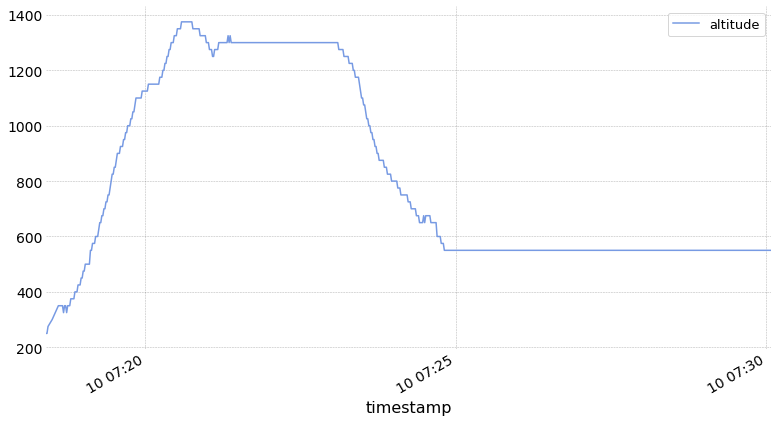

In [8]:
flightlist = [f for f in samu_flights]
with plt.style.context("traffic"):
    fig, ax = plt.subplots(figsize=(13, 7))
    flightlist[4].plot_time(ax, "altitude")